## Step 1: Reading the processed dataset

In [19]:
import pandas as pd

In [20]:
train_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_train.csv")
test_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_test.csv")

train_data.head()

,age,job_n,education_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0.185185,0.1,0.333333,0.008335,0.000000,0.354167,0.784879,0.439331,0.045568,0
1,0.370370,0.2,0.833333,0.016432,0.263158,1.000000,0.484412,0.615063,0.981637,0
2,0.135802,0.3,0.666667,0.145511,0.052632,1.000000,0.669135,0.338912,0.981183,0
3,0.222222,0.2,0.833333,0.030007,0.052632,0.000000,0.089634,1.000000,0.024031,0
4,0.518519,0.5,0.666667,0.016194,0.000000,0.104167,0.296960,0.418410,0.141918,0


In [21]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

## Step 2: Initialization and training of the model

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Step 3: Model prediction

### Base model

##### Train

In [23]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.9032759408806948

##### Test

In [25]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
accuracy_score(y_test, y_pred)

0.9033398342272062

### Confusion matrix

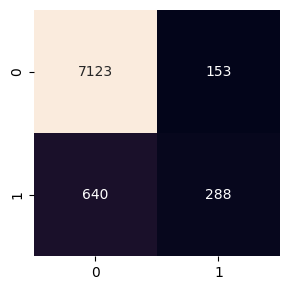

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

### Step 4: Optimization of results

In [28]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
    "multi_class": ["auto", "ovr", "multinomial"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [29]:
grid.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: U

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [30]:
grid.best_params_

{'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}

In [31]:
best_model = grid.best_estimator_

##### Train

In [32]:
y_pred = best_model.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
accuracy_score(y_train, y_pred)

0.903915892122505

##### Test

In [34]:
y_pred_test = best_model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
accuracy_score(y_test, y_pred_test)

0.9038274012676744

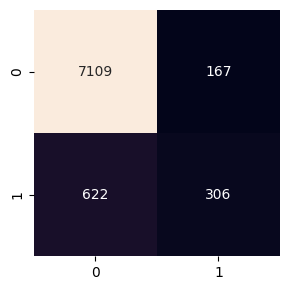

In [36]:
bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()